# Solos in the *Weimar Jazz Database*

**Disclaimer: I am not the expert here!**

The first project we will have a look at is the [*Jazzomat Research Project*](https://jazzomat.hfm-weimar.de/) that contains the *Weimar Jazz Database* (WJazzD).
Let us first browse the site.

Transcriptions of Jazz solos :cite:`Pfleiderer2017`. The *Weimar Jazz Database* (WJD) consists of 
456 transcriptions of Jazz solos from diverse substyles.
As all the corpora that we deal with here, it is freely available on the internet.

In [22]:
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

The WJazzD was already downloaded; we connect to the database with the help of `sqlite3`.

The database contains a number of tables: 

...

In [2]:
conn = sqlite3.connect("data/wjazzd.db")

In [3]:
conn

We can now use `pandas` to read the data out of the database.

In [4]:
solos = pd.read_sql("SELECT * FROM melody", con=conn)

The `"SELECT * FROM melody"` means "Select everything from the table 'melody' in the database". Let's look at the first ten entries. Likewise, we can select the `composition_info` table:

In [5]:
solos_meta = pd.read_sql("SELECT * from solo_info", con=conn)

In [6]:
solos_meta.sample(10)

,melid,trackid,compid,recordid,performer,title,titleaddon,solopart,instrument,style,avgtempo,tempoclass,rhythmfeel,key,signature,chord_changes,chorus_count
405,406,224,202,116,Steve Coleman,Pass It On,,1,as,FUSION,104.9,MEDIUM SLOW,FUNK,,4/4,A1: ||C-7 |Eb |C-7 |Eb ||\nA2: ||C-7 ...,2
57,58,53,53,24,Charlie Parker,K.C. Blues,,1,as,BEBOP,118.3,MEDIUM,SWING,C-maj,4/4,A1: ||C7 |F7 |C7 |C7 |F7 |F7 |C7 ...,2
430,431,329,289,177,Wayne Shorter,Footprints,,1,ts,POSTBOP,136.1,MEDIUM,SWING,C-min,6/4,A1: ||C-7 |C-7 |C-7 |C-7 |F-7 ...,4
269,270,233,210,119,Lee Konitz,Marshmallow,,1,as,COOL,298.6,UP,SWING,Bb-maj,4/4,A1: ||Bbj7 |Bbj7 |F-7 |Bb7 |Ebj7 |Eb...,1
151,152,136,123,67,Don Ellis,You Stepped Out of a Dream,,2,tp,POSTBOP,168.9,MEDIUM UP,SWING,D-maj,4/4,A1: ||Dj7 |Dj7 |Ebj7 |Ebj7 |F7 |F7 ...,1
394,395,310,275,86,Sonny Stitt,Good Kick,,1,as,BEBOP,173.4,MEDIUM UP,SWING,F-maj,4/4,A1: ||F7 |F7 |F7 D-7 |G-7 C7 |F7 |F7 |...,3
203,204,181,164,90,Joe Henderson,Totem Pole,,1,ts,POSTBOP,137.6,MEDIUM,SWING,Eb-min,4/4,A1: ||Eb-79 |Eb-79 |F7 |F7 |E7 |E7 ...,2
300,301,249,225,130,Michael Brecker,Delta City Blues,,1,ts,POSTBOP,281.7,UP,SWING,Bb-maj,4/4,A1: ||Bb7 |Bb7 |Bb7 |Bb7 |Bb7 |Bb7 ...,4
42,43,38,38,15,Branford Marsalis,U.M.M.G.,,1,ts,POSTBOP,211.6,UP,SWING,Db-maj,4/4,A1: ||Fm7b5 |Bb79b |Eb-7 |Ab7 |Dbo7 Db...,6
351,352,285,255,151,Paul Desmond,Samba Cantina,,2,as,COOL,152.7,MEDIUM UP,LATIN,F-min,4/4,A1: ||Gm7b5 |C79b |F-7 |F-7 |Bb-7 |E...,1


In [8]:
solos.head(10)

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737
5,6,1,11.551927,58.0,0.188662,4,1,1,1,1,...,,0.534657,67.636708,7.635221,0.411765,0.359536,1.049956,39.368720,6.589582,16.146429
6,7,1,11.859592,58.0,0.481814,4,1,1,2,1,...,vibrato,0.584914,63.659343,5.518070,0.068182,0.403372,0.983151,39.429103,5.406750,11.239471
7,8,1,14.535692,50.0,0.159637,4,1,3,3,1,...,,-0.129185,58.507975,5.020340,0.133333,0.368384,0.927912,174.398513,NaN,25.203232
8,9,1,14.799819,57.0,0.145125,4,2,3,4,1,...,,0.599931,71.173670,2.938194,0.285714,0.551884,1.064195,27.066543,7.758283,25.736430
9,10,1,14.973968,60.0,0.110295,4,2,3,4,2,...,,0.484532,69.632891,2.325457,0.600000,0.508617,1.038483,17.141304,11.184763,15.693739


In [9]:
solos.tail()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,f0_mod,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,slide,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001
200808,200809,456,64.058050,52.0,1.433832,4,2,54,3,2,...,vibrato,0.368321,58.174931,9.418678,0.053030,0.400571,1.278890,66.932198,2.153916,-9.381310


The `solos` table contains 26 columns that cannot be displayed at once. We can have a look at all columns by using the `.columns` attribute.

In [10]:
solos.columns

Index(['eventid', 'melid', 'onset', 'pitch', 'duration', 'period', 'division',
       'bar', 'beat', 'tatum', 'subtatum', 'num', 'denom', 'beatprops',
       'beatdur', 'tatumprops', 'f0_mod', 'loud_max', 'loud_med', 'loud_sd',
       'loud_relpos', 'loud_cent', 'loud_s2b', 'f0_range', 'f0_freq_hz',
       'f0_med_dev'],
      dtype='object')

In [11]:
mapper = dict(solos_meta[["melid", "performer"]].values)
mapper

{1: 'Art Pepper',
 2: 'Art Pepper',
 3: 'Art Pepper',
 4: 'Art Pepper',
 5: 'Art Pepper',
 6: 'Art Pepper',
 7: 'Benny Carter',
 8: 'Benny Carter',
 9: 'Benny Carter',
 10: 'Benny Carter',
 11: 'Benny Carter',
 12: 'Benny Carter',
 13: 'Benny Carter',
 14: 'Benny Goodman',
 15: 'Benny Goodman',
 16: 'Benny Goodman',
 17: 'Benny Goodman',
 18: 'Benny Goodman',
 19: 'Benny Goodman',
 20: 'Benny Goodman',
 21: 'Ben Webster',
 22: 'Ben Webster',
 23: 'Ben Webster',
 24: 'Ben Webster',
 25: 'Ben Webster',
 26: 'Bix Beiderbecke',
 27: 'Bix Beiderbecke',
 28: 'Bix Beiderbecke',
 29: 'Bix Beiderbecke',
 30: 'Bix Beiderbecke',
 31: 'Bob Berg',
 32: 'Bob Berg',
 33: 'Bob Berg',
 34: 'Bob Berg',
 35: 'Bob Berg',
 36: 'Bob Berg',
 37: 'Bob Berg',
 38: 'Branford Marsalis',
 39: 'Branford Marsalis',
 40: 'Branford Marsalis',
 41: 'Branford Marsalis',
 42: 'Branford Marsalis',
 43: 'Branford Marsalis',
 44: 'Buck Clayton',
 45: 'Buck Clayton',
 46: 'Buck Clayton',
 47: 'Cannonball Adderley',
 48: 'Ca

In [12]:
solos["performer"] = solos["melid"].map(mapper)

In [13]:
solos.head()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
0,1,1,10.343492,65.0,0.138776,4,1,0,1,1,...,0.126209,66.526087,5.541147,0.307692,0.389466,1.056169,37.794261,12.932532,-0.328442,Art Pepper
1,2,1,10.637642,63.0,0.171247,4,4,0,2,1,...,0.349751,69.133321,2.912412,0.250000,0.468687,1.120317,6.365930,6.956935,11.135423,Art Pepper
2,3,1,10.843719,58.0,0.081270,4,4,0,2,4,...,0.094051,66.352130,3.564563,0.428571,0.531354,1.310389,68.010392,NaN,32.366787,Art Pepper
3,4,1,10.948209,61.0,0.235102,4,1,0,3,1,...,0.521187,66.484173,2.414298,0.818182,0.559333,0.984047,15.443906,5.867151,-3.374696,Art Pepper
4,5,1,11.232653,63.0,0.130612,4,1,0,4,1,...,0.560737,71.699054,2.185794,0.166667,0.438973,1.061262,11.444363,8.329975,6.377737,Art Pepper


In [14]:
solos.tail()

,eventid,melid,onset,pitch,duration,period,division,bar,beat,tatum,...,loud_max,loud_med,loud_sd,loud_relpos,loud_cent,loud_s2b,f0_range,f0_freq_hz,f0_med_dev,performer
200804,200805,456,63.135057,57.0,0.168345,4,2,53,4,2,...,1.113380,72.169552,6.896394,0.687500,0.581956,1.271747,191.074095,10.966972,-11.891698,Zoot Sims
200805,200806,456,63.303401,55.0,0.087075,4,3,54,1,1,...,0.491496,69.732265,1.814723,0.500000,0.595212,1.339060,40.375449,NaN,-99.173779,Zoot Sims
200806,200807,456,63.390476,57.0,0.191565,4,3,54,1,2,...,1.187058,76.628621,2.628726,0.411765,0.590950,1.432802,104.823845,11.148561,-2.911604,Zoot Sims
200807,200808,456,63.640091,59.0,0.406349,4,1,54,2,1,...,0.972676,66.042058,3.690577,0.000000,0.334937,1.082549,165.810976,2.659723,14.311001,Zoot Sims
200808,200809,456,64.058050,52.0,1.433832,4,2,54,3,2,...,0.368321,58.174931,9.418678,0.053030,0.400571,1.278890,66.932198,2.153916,-9.381310,Zoot Sims


In [15]:
data = solos[solos.pitch.notnull() & solos.loud_med.notnull()]

A description of what these columns contain is stated on the website: https://jazzomat.hfm-weimar.de/dbformat/dbformat.html

We can now check how many solos the database contains.

In [16]:
grouped_df = solos.groupby("performer")

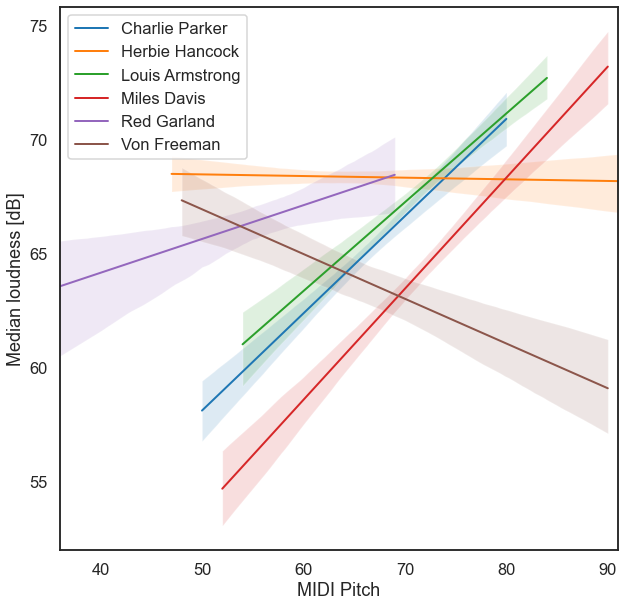

In [41]:
selected = ["Charlie Parker", "Miles Davis", "Louis Armstrong", "Herbie Hancock", "Von Freeman", "Red Garland"]

fig, ax = plt.subplots(figsize=(10,10))

for performer, df in grouped_df:
    if performer in selected:
        sns.regplot(
            data=df, 
            x="pitch", 
            y="loud_med", 
            x_jitter=.1, 
            y_jitter=.1, 
            scatter_kws={"alpha":.01, "color":"grey"}, 
            line_kws={"lw":2},
            label=performer,
            scatter=False,
            ax=ax
        )
        
plt.xlabel("MIDI Pitch")
plt.ylabel("Median loudness [dB]")
plt.legend()
plt.show()

**Observations:**

1. Most performers increase loudness with increasing pitch.
1. Charlie Parker (sax) and Louis Armstrong (t) show very similar patterns but Armstrong is generally higher.
1. Miles Davis (t) is similar to the two but plays generally softer than both.
1. Von Freeman (sax) strongly and Herbie Hancock (p) weakly decrease loudness with increasing pitch (almost all other performers show positive correlations).
1. Red Garland (p) plays generally lower than Herbie Hancock (p) but does show a positive correlation between pitch and loudness (NB: there is only one solo in the database).

Does this tell us something about performer styles or about instruments?

### The "rain cloud" of Jazz solos

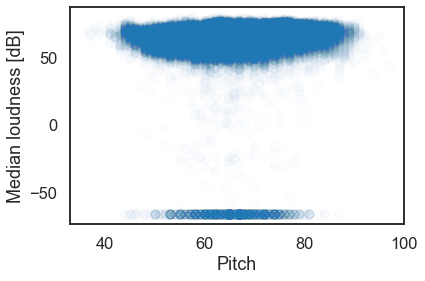

In [34]:
X = data[["pitch", "loud_med"]].values
x = X[:,0]
y = X[:,1]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x,y, alpha=0.01)

plt.xlabel("Pitch")
plt.ylabel("Median loudness [dB]")
plt.show()

In [74]:
solos["melid"].max()

456

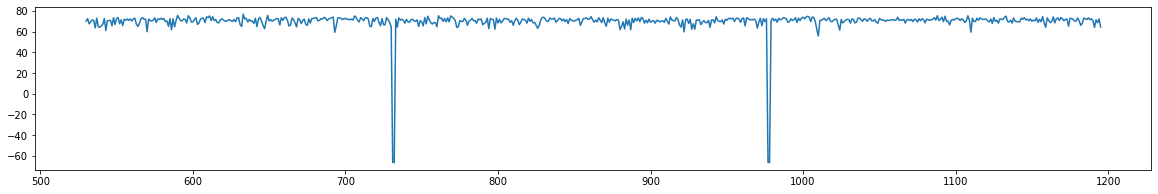

In [75]:
solos[ solos["melid"] == 2 ]["loud_med"].plot(figsize=(20,3));

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

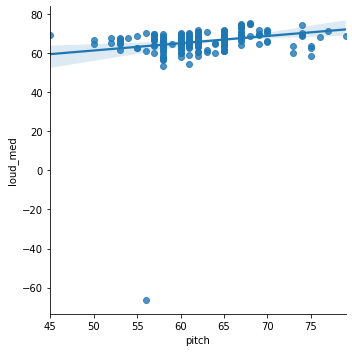

In [135]:
# fig, axes = plt.subplots(5,1, figsize=(15,20))

# for idx, rand in enumerate(np.random.randint(1,solos["melid"].unique().max(), 5)):
sns.lmplot(data=solos[ solos["melid"] == 130 ], x="pitch", y="loud_med");